In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import GLM_Fitter, Marr2Algorithms, make_LM, Abstract_1D_Model
from csv_analysis import make_regression_plots
import numpy as np
import seaborn as sb
import sys
import math
from scipy.stats import wilcoxon, ttest_1samp, mannwhitneyu, pearsonr, entropy, norm
from scipy.ndimage import gaussian_filter
from scipy.special import kl_div
from IPython.display import HTML
#sb.set()
import matplotlib
from matplotlib import animation as anim
from matplotlib import rc
sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})
matplotlib.rcParams['pdf.fonttype'] = 42

from matplotlib import pyplot as pl
from collections import Counter
from iventure.utils_bql import query
np.random.seed()
%matplotlib inline

In [2]:
# there's some level of noise you can't get around, which is why doing tungsten needle surgery is really difficult. 
# this is the y-intercept of the standard deviation fit. 

# if fixed noise is bigger than the goal, you are fucked. this is why you need a slightly larger than 0 degree
# strike zone. this is probably why the standard deviation of the strike zone definitively matches the fixed noise. 

# proportional noise is what you'd expect as an error from long distances, which require more complex movements, 
# than short distances, which require simpler movements. 

start_value = 100
strike_width = 15
proportion = .6
# this is the equation the proportional model is built from, which is a GLM fit of the DPMM results

#fixed_noise = ((start_value * .36) + 7.62)
fixed_noise = ((start_value * .36) + 7.62) * .5

fixed_noise = 7.62

#fixed_noise = ((start_value * .36) + 7.62) * .2

ab_1D_static = Abstract_1D_Model(strike_width, proportion, 'static', start_value)
ab_1D_fixednoise = Abstract_1D_Model(strike_width, proportion, 'fixed noise', start_value, fixed_noise)
ab_1D_propnoise = Abstract_1D_Model(strike_width, proportion, 'prop noise', start_value)

In [3]:
num_iter = 500
ab_1D_static.transform_loop(num_iter)
ab_1D_fixednoise.transform_loop(num_iter)
ab_1D_propnoise.transform_loop(num_iter)

In [4]:
print np.median(ab_1D_static.num_steps)
print np.median(ab_1D_fixednoise.num_steps)
print np.median(ab_1D_propnoise.num_steps)

4.0
4.0
3.0


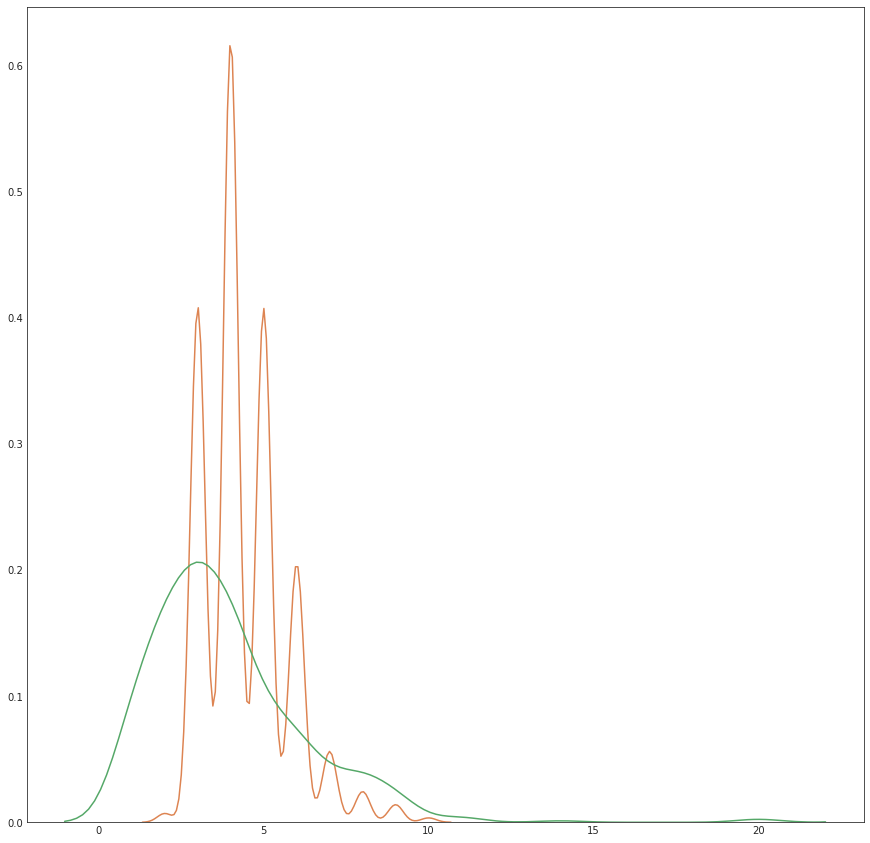

In [5]:
fig, ax = pl.subplots(1,1, figsize=(15,15))
#sb.kdeplot(ab_1D_static.num_steps, ax=ax, color=cp[0])
sb.kdeplot(ab_1D_fixednoise.num_steps, ax=ax, color=cp[1])
sb.kdeplot(ab_1D_propnoise.num_steps, ax=ax, color=cp[2])

In [90]:
def step_plotter(abs_obj):
    steps = abs_obj.steps[0]
    
 #   cp = sb.diverging_palette(250, 15, s=75, l=40, n=len(steps) + 1, center="light")
    cp = sb.color_palette("inferno", len(steps))
    fig, ax = pl.subplots(1, 1, figsize=(15, 3))
    ax.set_xlim([-25, 100])
    ax.set_ylim([-.1, .1])
    ax.get_yaxis().set_visible(False)
    ax.axvspan(abs_obj.termination[0], abs_obj.termination[1], alpha=0.3, color='r')
    framecount = len(steps) + 1
    def init():
        print('setting up graph')
        x_init = np.array([])
        y_init = np.array([])
        data = np.hstack((x_init[:, np.newaxis], y_init[:, np.newaxis]))
        plot.set_offsets(data)
        return (plot, )
        
    def animate(num):
        x = np.array(steps[0:num])
        data = np.hstack((x[:, np.newaxis], np.zeros(len(x))[:, np.newaxis]))
        plot.set_offsets(data)
        plot.set_facecolors(cp[:num])
        return (plot, )

    plot = ax.scatter([], [], s=400)
        
    line_ani = anim.FuncAnimation(
                fig,
                animate,
                frames=framecount,
                init_func = init, 
                interval=1000,
                repeat=True, 
                blit=False)
    return line_ani

setting up graph


setting up graph


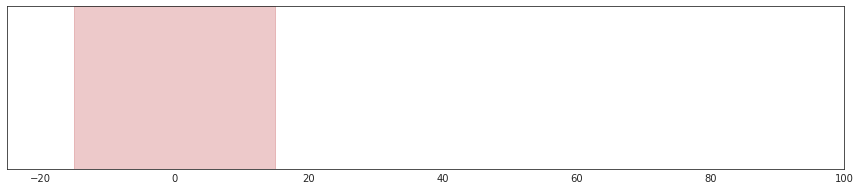

In [92]:
ani = step_plotter(ab_1D_propnoise)
rc('animation', html='jshtml')
ani

In [93]:
print ab_1D_propnoise.steps[0]

[100, 64.718596894201426, 32.881690552093147, 13.184754492177643]


In [ ]:
x = pl.scatter(range(5),range(5))

In [ ]:
x.set_facecolors(cp[:5])

In [ ]:
pl.show()

In [ ]:
pl.draw()

In [ ]:
pl.show()

In [ ]:
a, = np.random.normal(1,1,1)

In [ ]:
a

In [ ]:
v = np.stack((np.array([1,2,3]), np.array([4,5,6])))

In [ ]:
v.shape

In [ ]:
x = np.arange(10)
y = np.zeros(10)
p = pl.scatter(x, y)

In [ ]:
print y[:, np.newaxis]

In [ ]:
y = np.array([])

In [ ]:
y[:, np.newaxis]

In [ ]:
x = ab_1D_static.steps[0][0:1]
print x

In [ ]:
x[:, np.newaxis]